<a href="https://colab.research.google.com/github/aweeeaja/Kuliah/blob/main/PUI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras import layers
from keras import models
from keras import optimizers
from keras import regularizers

from keras.models import Model, Sequential
from keras import layers


In [14]:
# visulization function for Models
def visualize(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    axs[0].plot(epochs, acc, 'r', label='Training acc')
    axs[0].plot(epochs, val_acc, 'b', label='Validation acc')
    axs[0].set_title('Training and validation accuracy')
    axs[0].legend()
    axs[0].grid(True)

    axs[1].plot(epochs, loss, 'r', label='Training loss')
    axs[1].plot(epochs, val_loss, 'b', label='Validation loss')
    axs[1].set_title('Training and validation loss')
    axs[1].legend()
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()

In [15]:
import matplotlib.pyplot as plt

def visualize_all(history, epochs_to_display):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    for epoch in epochs_to_display:
        axs[0].plot(epoch, acc[epoch - 1], 'ro')  # Menampilkan titik merah untuk training accuracy pada epoch tertentu
        axs[0].plot(epoch, val_acc[epoch - 1], 'bo')  # Menampilkan titik biru untuk validation accuracy pada epoch tertentu

        axs[1].plot(epoch, loss[epoch - 1], 'ro')  # Menampilkan titik merah untuk training loss pada epoch tertentu
        axs[1].plot(epoch, val_loss[epoch - 1], 'bo')  # Menampilkan titik biru untuk validation loss pada epoch tertentu

    axs[0].plot(epochs, acc, 'r-', label='Training acc')
    axs[0].plot(epochs, val_acc, 'b-', label='Validation acc')
    axs[0].set_title('Training and validation accuracy')
    axs[0].legend()
    axs[0].grid(True)

    axs[1].plot(epochs, loss, 'r-', label='Training loss')
    axs[1].plot(epochs, val_loss, 'b-', label='Validation loss')
    axs[1].set_title('Training and validation loss')
    axs[1].legend()
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()

# Contoh penggunaan
epochs_to_display = [10, 20, 30, 40, 50]  # Misalnya, ingin menampilkan visualisasi untuk epoch 10, 20, 30, 40, dan 50


In [16]:
import os
import shutil

 # use this function for preparing data
training_dir="/content/drive/MyDrive/PUI/train"
validation_dir="/content/drive/MyDrive/PUI/validation"
test_dir="/content/drive/MyDrive/PUI/test_data"

def prep_data(augmented,batch_size=16):
    if augmented:
        train_datagen = ImageDataGenerator(
            rescale=1./255,
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True)

        validation_datagen = ImageDataGenerator(rescale=1./255)

    else:
        train_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
        validation_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

    # training set
    train_set = train_datagen.flow_from_directory(
        training_dir,
        target_size=(64, 64),  # The dimensions to which all images found will be resized
        batch_size=batch_size,# 32  default
        class_mode="binary") # you can change this to onehotEncoded format or another format


    # validation set
    validation_set = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(64, 64),
        batch_size=batch_size,  # 32 default
        class_mode="binary")

    return train_set , validation_set

In [17]:
# augmented train dataset
augmented_train_set,validation_set=prep_data(True)

Found 5285 images belonging to 2 classes.
Found 1010 images belonging to 2 classes.


In [18]:
# not augmented train set
straight_train_set,validation_set=prep_data(False)

Found 5285 images belonging to 2 classes.
Found 1010 images belonging to 2 classes.


In [19]:
import os
import matplotlib.pyplot as plt

# Eğitim setindeki sınıf dağılımını hesapla
train_class_counts = {}
for class_folder in os.listdir(training_dir):
    class_path = os.path.join(training_dir, class_folder)
    if os.path.isdir(class_path):
        num_images = len(os.listdir(class_path))
        train_class_counts[class_folder] = num_images

# Doğrulama setindeki sınıf dağılımını hesapla
validation_class_counts = {}
for class_folder in os.listdir(validation_dir):
    class_path = os.path.join(validation_dir, class_folder)
    if os.path.isdir(class_path):
        num_images = len(os.listdir(class_path))
        validation_class_counts[class_folder] = num_images

print("Training set Distribution:")
print(train_class_counts)

print("Validation set Distribution:")
print(validation_class_counts)

Training set Distribution:
{'generate_ai': 2785, 'non_ai': 2500}
Validation set Distribution:
{'generate_ai': 505, 'non_ai': 505}


# **Bangun Model**

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Membuat objek model Sequential
model = Sequential()

# Menambahkan layer Convolutional pertama
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 3)))

# Menambahkan layer Convolutional kedua
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))

# Menambahkan layer Max Pooling
model.add(MaxPooling2D(pool_size=(2, 2)))

# Menambahkan layer Dropout
model.add(Dropout(rate=0.01))

# Menambahkan layer Convolutional ketiga
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))

# Menambahkan layer Convolutional keempat
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))

# Menambahkan layer Max Pooling
model.add(MaxPooling2D(pool_size=(2, 2)))

# Menambahkan layer Dropout
model.add(Dropout(rate=0.01))

# Menambahkan layer Flatten
model.add(Flatten())

# Menambahkan layer Dense dengan 256 unit neuron dan fungsi aktivasi ReLU
model.add(Dense(units=256, activation='relu'))

# Menambahkan layer Dropout
model.add(Dropout(rate=0.01))

# Menambahkan layer Dense output dengan 1 unit neuron (untuk klasifikasi biner) dan fungsi aktivasi sigmoid
model.add(Dense(units=1, activation='sigmoid'))

# Mengompilasi model
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Menampilkan ringkasan model
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 30, 30, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 26, 26, 64)        36928     
                                                      

In [21]:
train_set,validation_set=prep_data(True, batch_size=32)

Found 5285 images belonging to 2 classes.
Found 1010 images belonging to 2 classes.


In [22]:
# latih
latih1 = model.fit(train_set, epochs=100, validation_data=validation_set, )


Epoch 1/100
166/166 [==============================] - 624s 4s/step - loss: 0.6263 - accuracy: 0.6412 - val_loss: 0.6933 - val_accuracy: 0.6178
Epoch 2/100
166/166 [==============================] - 36s 220ms/step - loss: 0.5586 - accuracy: 0.7156 - val_loss: 0.6258 - val_accuracy: 0.7158
Epoch 3/100
166/166 [==============================] - 35s 213ms/step - loss: 0.5524 - accuracy: 0.7256 - val_loss: 0.5801 - val_accuracy: 0.7198
Epoch 4/100
166/166 [==============================] - 35s 214ms/step - loss: 0.5257 - accuracy: 0.7406 - val_loss: 0.5221 - val_accuracy: 0.7386
Epoch 5/100
166/166 [==============================] - 35s 209ms/step - loss: 0.5283 - accuracy: 0.7349 - val_loss: 0.5371 - val_accuracy: 0.7238
Epoch 6/100
166/166 [==============================] - 35s 212ms/step - loss: 0.5147 - accuracy: 0.7478 - val_loss: 0.6002 - val_accuracy: 0.6950
Epoch 7/100
166/166 [==============================] - 36s 216ms/step - loss: 0.4949 - accuracy: 0.7627 - val_loss: 0.5411 - v

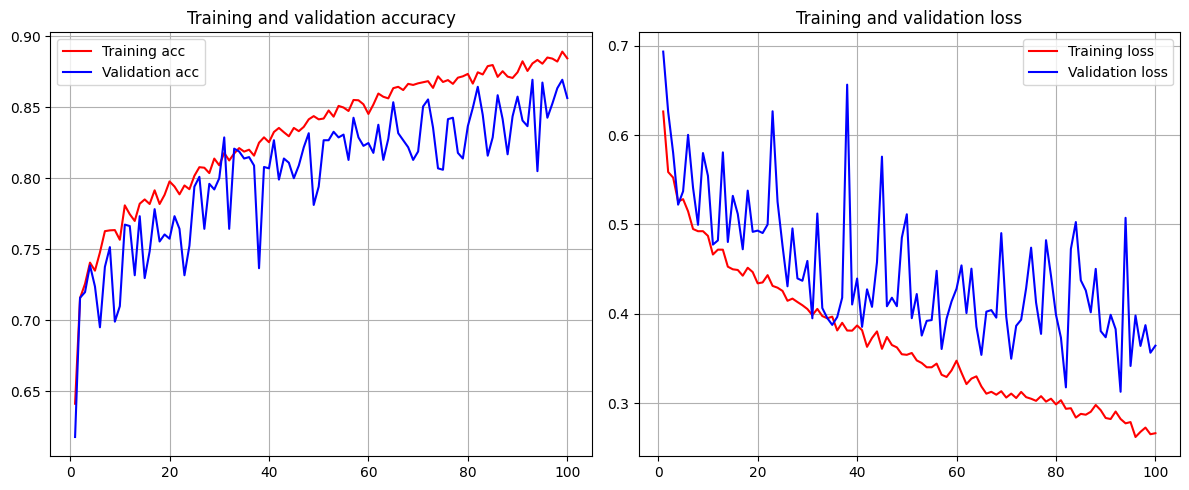

In [23]:
visualize(latih1)

In [26]:
from tensorflow.keras.models import save_model

# Simpan model ke file 'model_terlatih.h5'
save_model(model,'model_terlatih.h5')


<ipython-input-26-ee67c1c079fe>:4: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model,'model_terlatih.h5')


In [1]:
from tensorflow.keras.models import load_model

# Load model yang telah dilatih
model = load_model('model_terlatih.h5')

# Load dataset untuk prediksi
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',  # Atau 'binary' jika Anda menggunakan klasifikasi biner
    shuffle=False
)
# Lakukan prediksi pada data uji
hasil_prediksi = model.predict(test_dir)

# Tampilkan hasil prediksi
print(hasil_prediksi)


OSError: No file or directory found at model_terlatih.h5